# **Exercise 01: binary classification models**

Import necessary *Python* packages:

In [1]:
import matplotlib.pyplot as plt

Import necessary entities:

In [2]:

from sklearn.svm import SVC
from seaborn import scatterplot
from warnings import filterwarnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pandas import (
    Series,
    DataFrame,
    read_csv,
)
from numpy import (
    c_,
    ndarray,
    meshgrid,
    linspace,
)

Ignore all warnings:

In [3]:
filterwarnings("ignore", )

Create a dictionary for `read_csv()` method calling:

In [4]:
read_csv_params: dict[str, str | list] = {
    "file": "am_pm.csv",
    "file_path": "../../data/datasets/",
    "parse_dates": ["date", ],
}

## Read the file `am_pm.csv` to a *Pandas* dataframe:

In [5]:
df: DataFrame = read_csv(
    read_csv_params["file_path"] + read_csv_params["file"],
    parse_dates=read_csv_params["parse_dates"],
    index_col=0,
)

Check `df` *Pandas* dataframe:

In [6]:
df.head()

,date,am,pm,target,named_target,naive_prediction
0,2020-04-17,21,2,0,working_day,0
1,2020-04-18,1,68,1,weekend_day,1
2,2020-04-19,18,15,1,weekend_day,0
3,2020-04-20,2,23,0,working_day,1
4,2020-04-21,0,25,0,working_day,1


Prepare features and target variables:

In [7]:
X: DataFrame = df[["am", "pm", ]]
y: Series = df["target"]

Check `X` and `y` variables:

In [8]:
X.head()

,am,pm
0,21,2
1,1,68
2,18,15
3,2,23
4,0,25


In [9]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

Create a model of *logistic regression*:

In [10]:
log_reg_model: LogisticRegression = LogisticRegression(
    random_state=21,
    fit_intercept=False,
)

Train *logistic regression* model on `am` and `pm` data:

In [11]:
log_reg_model.fit(X, y, );

Prepare grid for visualization:

In [12]:
xx, yy = meshgrid(
    linspace(
        df["am"].min(),
        df["am"].max(),
        250,
    ),
    linspace(
        df["pm"].min(),
        df["pm"].max(),
        250,
    ),
)

Make prediction by *logistic regression* model for every point of grid:

In [13]:
log_reg_model_resp: Series = log_reg_model.predict(
    c_[
        xx.ravel(),
        yy.ravel(),
    ],
).reshape(
    xx.shape,
)

Create a *logistic regression* model decision boundary:

In [14]:
log_reg_model_decision_boundary: DecisionBoundaryDisplay = \
DecisionBoundaryDisplay(
    xx0=xx,
    xx1=yy,
    response=log_reg_model_resp,
)

## Draw a plot where the `x` is `am`, the `y` is `pm`, dots are the days, color depends on the `named_target`:

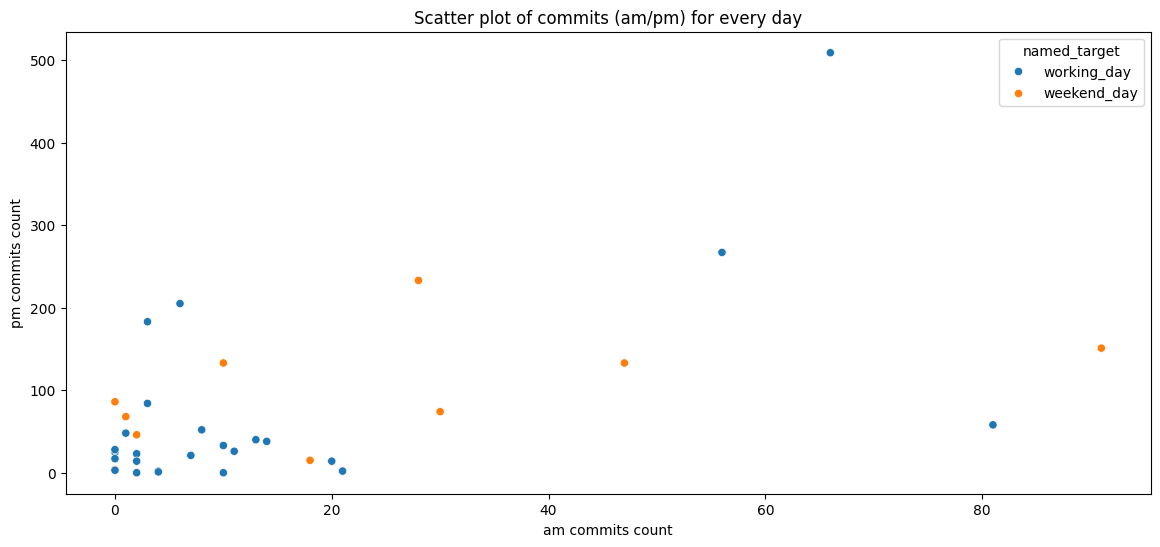

In [15]:
plt.figure(figsize=(14, 6, ), )
scatterplot(
    data=df,
    x="am",
    y="pm",
    hue="named_target",
)
plt.title("Scatter plot of commits (am/pm) for every day", )
plt.xlabel("am commits count", )
plt.ylabel("pm commits count", )
plt.show()

## Draw the decision boundary of *logistic regression* model:

<Figure size 1400x600 with 0 Axes>

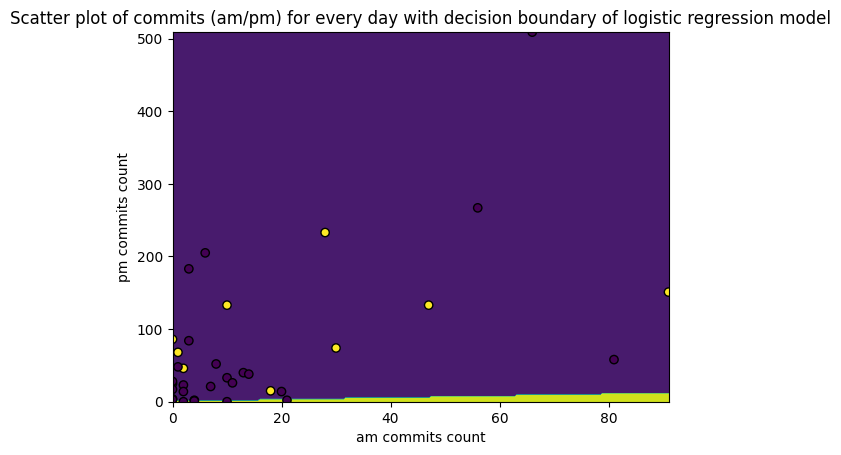

In [16]:
plt.figure(figsize=(14, 6, ), )
log_reg_model_decision_boundary.plot()
log_reg_model_decision_boundary.ax_.scatter(
    df["am"],
    df["pm"],
    c=df["target"],
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with decision boundary of" +
    " logistic regression model",
)
plt.xlabel("am commits count", )
plt.ylabel("pm commits count", )
plt.show()

## Draw the plot, but the color should depend on the *logistic regression* model predictions:

<Figure size 1400x600 with 0 Axes>

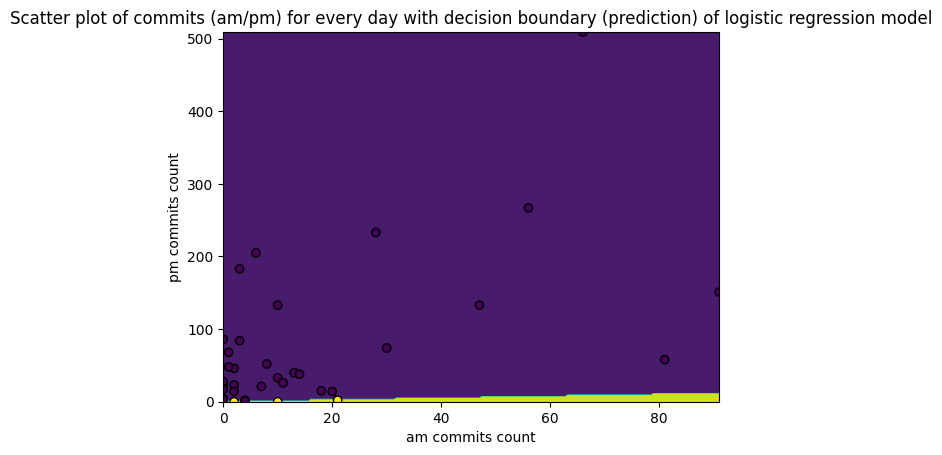

In [17]:
plt.figure(figsize=(14, 6, ), )
log_reg_model_decision_boundary.plot()
log_reg_model_decision_boundary.ax_.scatter(
    df["am"],
    df["pm"],
    c=log_reg_model.predict(X, ),
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with decision boundary " +
    "(prediction) of logistic regression model",
)
plt.xlabel("am commits count", )
plt.ylabel("pm commits count", )
plt.show()

## Linear models can be sensitive to the scale of your variables.

Create a model of standart scaler:

In [18]:
std_scaler_model: StandardScaler = StandardScaler()

## Apply `std_scaler_model` model to `X` data:

In [19]:
scaled_X: ndarray = std_scaler_model.fit_transform(X, )

Check `scaled_X` scaled data:

In [20]:
scaled_X[: 5]

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703]])

Train *logistic regression* model on scaled `am` and `pm` data:

In [21]:
log_reg_model.fit(scaled_X, y, );

## Calculate *logistic regression* model accuracy for scaled data:

In [22]:
print(
    "The logistic regression model accuracy is:",
    round(
        accuracy_score(
            df["target"],
            log_reg_model.predict(scaled_X, ),
        ),
        3,
    ),
)

The logistic regression model accuracy is: 0.743


## `Did it get better than a naive classifier with the most popular class?`

Answer: yes, it did.

Prepare scaled grid for visualization:

In [23]:
scaled_xx, scaled_yy = meshgrid(
    linspace(
        scaled_X[:, 0].min(),
        scaled_X[:, 0].max(),
        250,
    ),
    linspace(
        scaled_X[:, 1].min(),
        scaled_X[:, 1].max(),
        250,
    ),
)

Make prediction by *logistic regression* model for every point of scaled grid:

In [24]:
log_reg_model_scaled_resp: Series = log_reg_model.predict(
    c_[
        scaled_xx.ravel(),
        scaled_yy.ravel(),
    ],
).reshape(
    scaled_xx.shape,
)

Create a *logistic regression* model scaled decision boundary:

In [25]:
log_reg_model_scaled_decision_boundary: DecisionBoundaryDisplay = \
DecisionBoundaryDisplay(
    xx0=scaled_xx,
    xx1=scaled_yy,
    response=log_reg_model_scaled_resp,
)

## Draw the scaled decision boundary of *logistic regression* model:

<Figure size 1400x600 with 0 Axes>

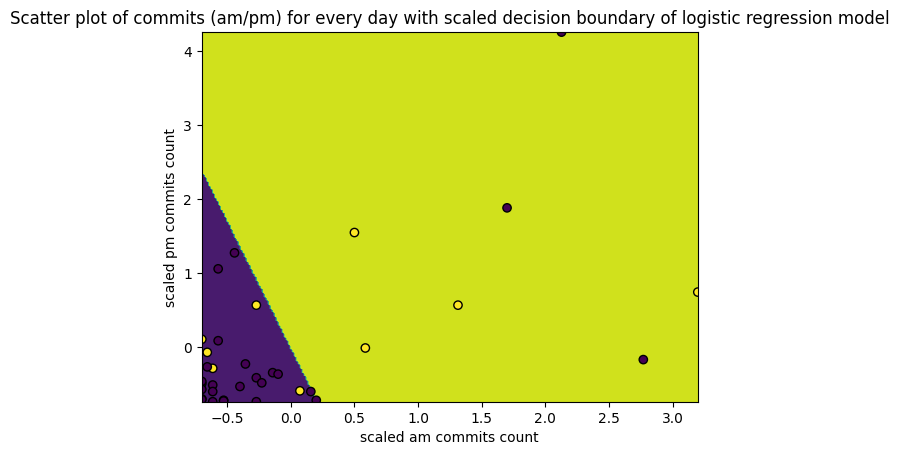

In [26]:
plt.figure(figsize=(14, 6, ), )
log_reg_model_scaled_decision_boundary.plot()
log_reg_model_scaled_decision_boundary.ax_.scatter(
    scaled_X[:, 0],
    scaled_X[:, 1],
    c=df["target"],
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with scaled decision " +
    "boundary of logistic regression model",
)
plt.xlabel("scaled am commits count", )
plt.ylabel("scaled pm commits count", )
plt.show()

## Draw the plot, but the color should depend on the scaled *logistic regression* model predictions:

<Figure size 1400x600 with 0 Axes>

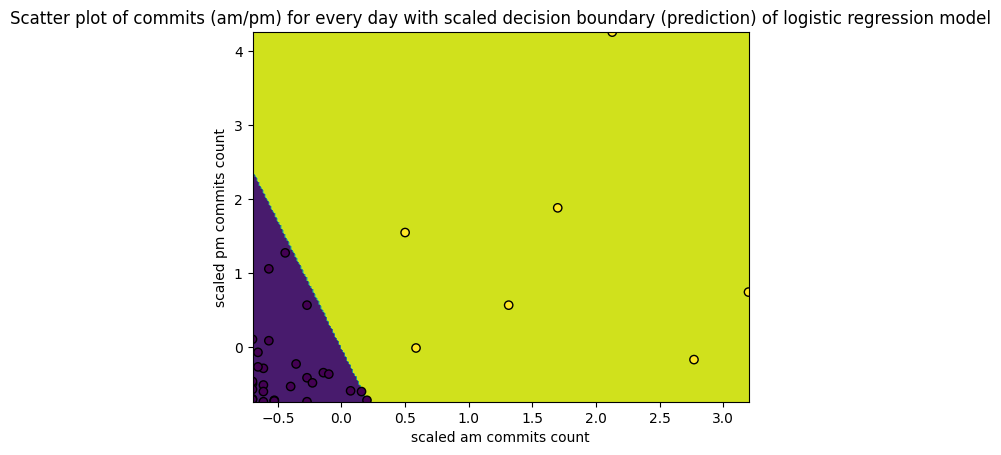

In [27]:
plt.figure(figsize=(14, 6, ), )
log_reg_model_scaled_decision_boundary.plot()
log_reg_model_scaled_decision_boundary.ax_.scatter(
    scaled_X[:, 0],
    scaled_X[:, 1],
    c=log_reg_model.predict(scaled_X, ),
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with scaled decision " +
    "boundary (prediction) of logistic regression model",
)
plt.xlabel("scaled am commits count", )
plt.ylabel("scaled pm commits count", )
plt.show()

Create a model of *SVC*:

In [28]:
svc_model: SVC = SVC(probability=True, random_state=21, )

## Train *SVC* model on scaled `am` and `pm` data:

In [29]:
svc_model.fit(scaled_X, y, );

## Calculate *SVC* model accuracy for scaled data:

In [30]:
print(
    "The SVC model accuracy is:",
    round(
        accuracy_score(
            df["target"],
            svc_model.predict(scaled_X, ),
        ),
        3,
    ),
)

The SVC model accuracy is: 0.743


Create a dictionary with different *SVC* model kernels:

In [31]:
svc_kernels: dict[str, float] = {
    "rbf": 0.0,
    "poly": 0.0,
    "linear": 0.0,
    "sigmoid": 0.0,
}

## Try different *SVC* model `kernel`s:

In [32]:
for svc_kernel in svc_kernels.keys():
    loc_svc_model: SVC = SVC(
        probability=True,
        random_state=21,
        kernel=svc_kernel,
    )

    loc_svc_model.fit(scaled_X, y, )

    svc_kernels[svc_kernel] = round(
        accuracy_score(
            df["target"],
            loc_svc_model.predict(scaled_X, ),
        ),
        3,
    )

Find the best *SVC* model kernel:

In [33]:
print(
    f"The best SVC model kernel is:",
    max(
        svc_kernels,
        key=lambda svc_kernel: svc_kernel[1],
    ),
)

The best SVC model kernel is: poly


Create a model of *SVC* with the best kernel:

In [34]:
optimized_svc_model: SVC = SVC(
    probability=True,
    random_state=21,
    kernel=max(
        svc_kernels,
        key=lambda svc_kernel: svc_kernel[1],
    ),
)

## Train optimized *SVC* model on the scaled `am` and `pm` data:

In [35]:
optimized_svc_model.fit(scaled_X, y, );

Make prediction by optimized *SVC* model for every point of scaled grid:

In [36]:
optimized_svc_model_resp: Series = optimized_svc_model.predict(
    c_[
        scaled_xx.ravel(),
        scaled_yy.ravel(),
    ],
).reshape(
    scaled_xx.shape,
)

Create a optimized *SVC* model scaled decision boundary:

In [37]:
optimized_svc_model_decision_boundary: DecisionBoundaryDisplay = \
DecisionBoundaryDisplay(
    xx0=scaled_xx,
    xx1=scaled_yy,
    response=optimized_svc_model_resp,
)

## Draw the scaled decision boundary of optimized *SVC* model:

<Figure size 1400x600 with 0 Axes>

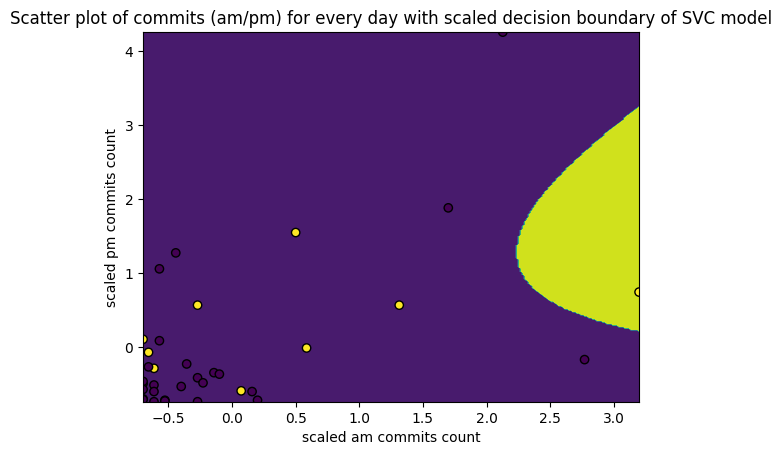

In [38]:
plt.figure(figsize=(14, 6, ), )
optimized_svc_model_decision_boundary.plot()
optimized_svc_model_decision_boundary.ax_.scatter(
    scaled_X[:, 0],
    scaled_X[:, 1],
    c=df["target"],
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with scaled decision " +
    "boundary of SVC model",
)
plt.xlabel("scaled am commits count", )
plt.ylabel("scaled pm commits count", )
plt.show()

## Draw the plot, but the color should depend on the scaled optimized *SVC* model predictions:

<Figure size 1400x600 with 0 Axes>

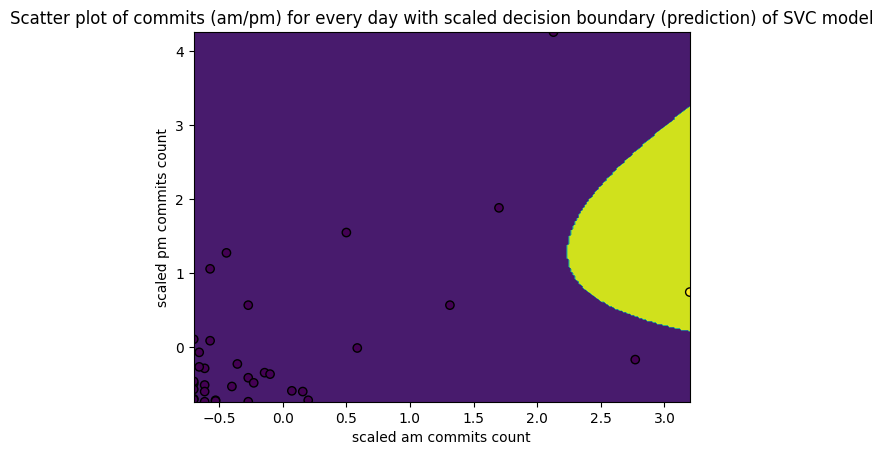

In [39]:
plt.figure(figsize=(14, 6, ), )
optimized_svc_model_decision_boundary.plot()
optimized_svc_model_decision_boundary.ax_.scatter(
    scaled_X[:, 0],
    scaled_X[:, 1],
    c=optimized_svc_model.predict(scaled_X, ),
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with scaled decision " +
    "boundary (prediction) of SVC model",
)
plt.xlabel("scaled am commits count", )
plt.ylabel("scaled pm commits count", )
plt.show()

Create a model of *decision tree*:

In [40]:
tree_model: DecisionTreeClassifier = DecisionTreeClassifier(
    max_depth=4,
    random_state=42,
)

## Train *decision tree* model on scaled `am` and `pm` data:

In [41]:
tree_model.fit(scaled_X, y, );

## Calculate *decision tree* model accuracy for scaled data:

In [42]:
print(
    "The decision tree model accuracy is:",
    round(
        accuracy_score(
            df["target"],
            tree_model.predict(scaled_X, ),
        ),
        3,
    ),
)

The decision tree model accuracy is: 0.943


Create a dictionary with different `max_depth` parameter values:

In [43]:
max_depths: dict[int, float] = {max_depth: 0.0 for max_depth in range(1, 15, )}

## Try different values of `max_depth` parameter:

In [44]:
for max_depth in max_depths:
    loc_tree_model: DecisionTreeClassifier = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=42,
    )

    loc_tree_model.fit(scaled_X, y, )

    max_depths[max_depth] = round(
        accuracy_score(
            df["target"],
            loc_tree_model.predict(scaled_X, ),
        ),
        3,
    )

Find the best *decision tree* model `max_depth` parameter value:

In [45]:
print(
    f"The best decision tree model `max_depth` is:",
    max(
        max_depths.items(),
        key=lambda max_depth: max_depth[1],
    )[0],
)

The best decision tree model `max_depth` is: 6


Create a model of *decision tree* with the best `max_depth` parameter value:

In [46]:
optimized_tree_model: DecisionTreeClassifier = DecisionTreeClassifier(
    max_depth=max(
        max_depths.items(),
        key=lambda max_depth: max_depth[1],
    )[0],
    random_state=42,
)

Train optimized *decision tree* model on the scaled `am` and `pm` data:

In [47]:
optimized_tree_model.fit(scaled_X, y, );

Make prediction by optimized *decision tree* model for every point of scaled grid:

In [48]:
optimized_tree_model_resp: Series = optimized_tree_model.predict(
    c_[
        scaled_xx.ravel(),
        scaled_yy.ravel(),
    ],
).reshape(
    scaled_xx.shape,
)

Create a optimized *decision tree* model scaled decision boundary:

In [49]:
optimized_tree_model_decision_boundary: DecisionBoundaryDisplay = \
DecisionBoundaryDisplay(
    xx0=scaled_xx,
    xx1=scaled_yy,
    response=optimized_tree_model_resp,
)

## Draw the scaled decision boundary of optimized *decision tree* model:

<Figure size 1400x600 with 0 Axes>

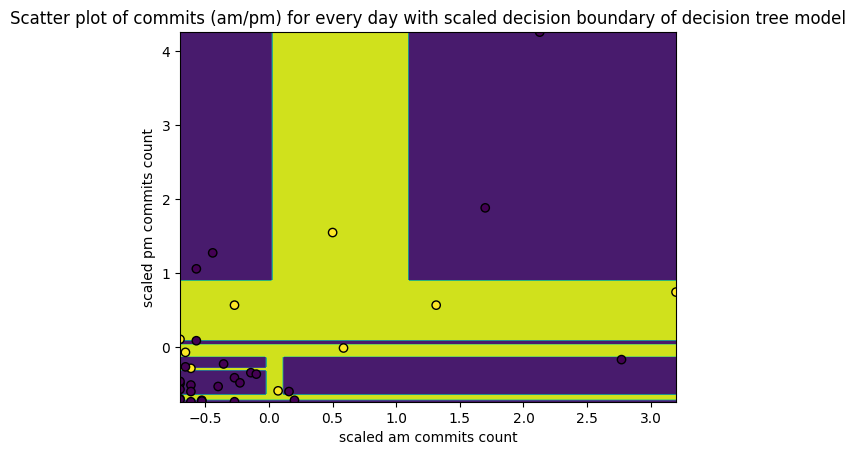

In [50]:
plt.figure(figsize=(14, 6, ), )
optimized_tree_model_decision_boundary.plot()
optimized_tree_model_decision_boundary.ax_.scatter(
    scaled_X[:, 0],
    scaled_X[:, 1],
    c=df["target"],
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with scaled decision " +
    "boundary of decision tree model",
)
plt.xlabel("scaled am commits count", )
plt.ylabel("scaled pm commits count", )
plt.show()

## Draw the plot, but the color should depend on the scaled optimized *decision tree* model predictions:

<Figure size 1400x600 with 0 Axes>

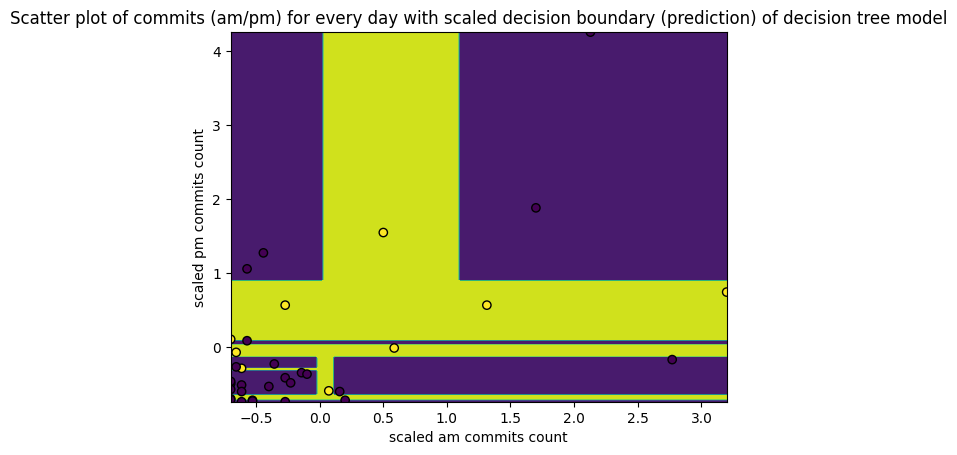

In [51]:
plt.figure(figsize=(14, 6, ), )
optimized_tree_model_decision_boundary.plot()
optimized_tree_model_decision_boundary.ax_.scatter(
    scaled_X[:, 0],
    scaled_X[:, 1],
    c=optimized_tree_model.predict(scaled_X, ),
    edgecolor="black",
)
plt.title(
    "Scatter plot of commits (am/pm) for every day with scaled decision " +
    "boundary (prediction) of decision tree model",
)
plt.xlabel("scaled am commits count", )
plt.ylabel("scaled pm commits count", )
plt.show()

## Using method `plot_tree()` visualize the decision tree:

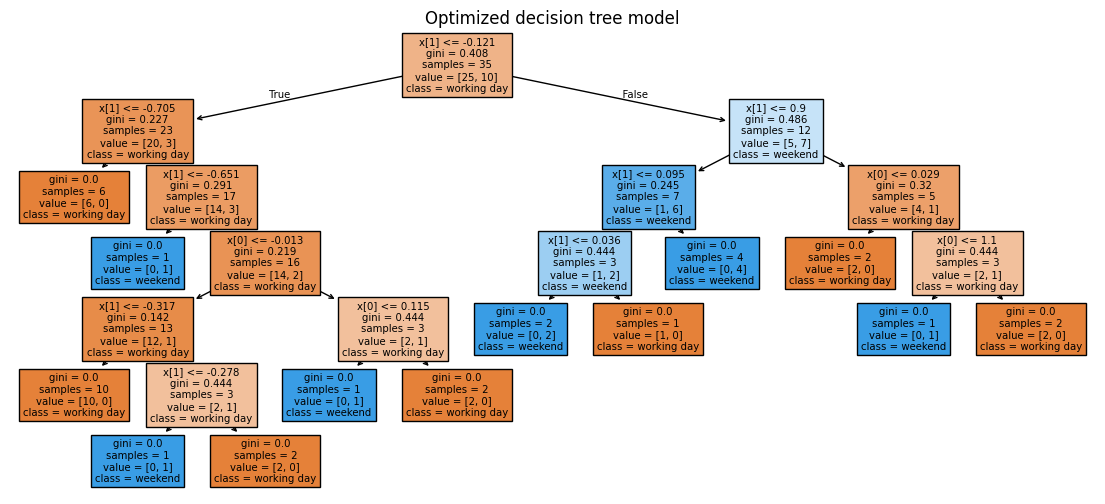

In [52]:
plt.figure(figsize=(14, 6, ), )
plot_tree(
    optimized_tree_model,
    filled=True,
    class_names=["working day", "weekend", ],
)
plt.title("Optimized decision tree model", )
plt.show()

## `How many leaves in the visualized tree label days as working days?`

Answer: 6 leaves.